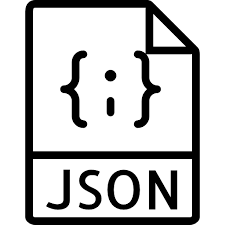

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [1]:
# We'll need to import the json package first
import json

In [2]:
# Now use with open to load the file
with open('data/new_releases.json') as file:
    data = json.load(file)

In [3]:
open_file = open('data/new_releases.json')
data = json.load(open_file)
open_file.close()

In [4]:
type(data)

dict

In [5]:
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [6]:
# This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [7]:
# One way to make it easier to read
print(json.dumps(data, indent=2))

{
  "albums": {
    "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
    "items": [
      {
        "album_type": "album",
        "artists": [
          {
            "external_urls": {
              "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
            },
            "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
            "id": "1RyvyyTE3xzB2ZywiAwp0i",
            "name": "Future",
            "type": "artist",
            "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
          }
        ],
        "available_markets": [
          "AD",
          "AE",
          "AR",
          "AT",
          "AU",
          "BE",
          "BG",
          "BH",
          "BO",
          "BR",
          "CA",
          "CH",
          "CL",
          "CO",
          "CR",
          "CY",
          "CZ",
          "DE",
          "DK",
          "DO",
          "DZ",
          "EC",
          "EE",
          "EG",
       

In [8]:
# Using the default Jupyter Notebook's display() helps
#display(data) 
# Uncomment this to do the same as just displaying the last line
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [9]:
# How can we access the keys?
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [10]:
data.get('albums')

{'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
 'items': [{'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
     'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
     'id': '1RyvyyTE3xzB2ZywiAwp0i',
     'name': 'Future',
     'type': 'artist',
     'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
 

In [11]:
data['albums']

{'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
 'items': [{'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
     'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
     'id': '1RyvyyTE3xzB2ZywiAwp0i',
     'name': 'Future',
     'type': 'artist',
     'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
 

In [12]:
type(data.get('albums'))

dict

In [44]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [13]:
data.get('albums').keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [14]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [43]:
data['albums']['total']

100

In [15]:
type(data['albums']['items'])

list

In [16]:
data[0]

KeyError: 0

In [17]:
data['albums'][0]

KeyError: 0

In [21]:
# How can I grab the first entry?
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [22]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [24]:
# Lets get the artist name
data['albums']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
  'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
  'id': '1RyvyyTE3xzB2ZywiAwp0i',
  'name': 'Future',
  'type': 'artist',
  'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}]

In [25]:
albums = data['albums']['items']

In [26]:
type(albums)

list

In [27]:
len(albums)

20

In [28]:
type(albums[0]['artists'])

list

In [29]:
len(data['albums']['items'][0]['artists'])

1

In [33]:
data['albums']['items'][0]['artists'][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [30]:
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [35]:
# Name of 2nd album artist
data['albums']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/23fqKkggKUBHNkbKtXEls4'},
  'href': 'https://api.spotify.com/v1/artists/23fqKkggKUBHNkbKtXEls4',
  'id': '23fqKkggKUBHNkbKtXEls4',
  'name': 'Kygo',
  'type': 'artist',
  'uri': 'spotify:artist:23fqKkggKUBHNkbKtXEls4'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5Pwc4xIPtQLFEnJriah9YJ'},
  'href': 'https://api.spotify.com/v1/artists/5Pwc4xIPtQLFEnJriah9YJ',
  'id': '5Pwc4xIPtQLFEnJriah9YJ',
  'name': 'OneRepublic',
  'type': 'artist',
  'uri': 'spotify:artist:5Pwc4xIPtQLFEnJriah9YJ'}]

In [36]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [39]:
data['albums']['items'][1]['name']

'Lose Somebody'

In [40]:
albums = data['albums']['items']

In [41]:
len(albums)

20

In [42]:
albums[0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [45]:
with open('data/plants.json') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [46]:
type(plants)

list

In [47]:
# How many entries should we have? We can sanity check
len(plants)

1000

In [48]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [49]:
# First plant
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [50]:
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [51]:
# Let's use a default dict for this - need to import it first!
from collections import defaultdict

In [52]:
plant_dict = defaultdict(int)
plant_dict

defaultdict(int, {})

In [53]:
family_names = [plant['family_common_name'] for plant in plants]
family_names

['Beech family',
 'Nettle family',
 'Grass family',
 'Plantain family',
 'Beech family',
 'Grass family',
 'Buttercup family',
 'Grass family',
 'Pea family',
 'Olive family',
 'Rose family',
 'Pea family',
 'Buttercup family',
 'Birch family',
 'Beech family',
 'Rush family',
 'Buckwheat family',
 'Grass family',
 'Rose family',
 'Soapberry family',
 'Plantain family',
 'Grass family',
 'Pine family',
 'Pea family',
 'Grass family',
 'Mint family',
 'Rose family',
 'Madder family',
 None,
 'Grass family',
 'Pink family',
 'Birch family',
 'Grass family',
 'Birch family',
 'Carrot family',
 'Geranium family',
 'Grass family',
 'Rose family',
 'Grass family',
 'Mint family',
 'Grass family',
 'Grass family',
 None,
 'Rose family',
 'Aster family',
 'Aster family',
 'Beech family',
 'Carrot family',
 'Carrot family',
 'Aster family',
 'Horsetail family',
 'Rose family',
 'Pine family',
 'Grass family',
 'Plantain family',
 'Heath family',
 'Loosestrife family',
 'Grass family',
 'Aster f

In [54]:
len(family_names)

1000

In [55]:
unique_names = set(family_names)
unique_names

{'Acanthus family',
 "Adder's-tongue family",
 'Amaranth family',
 'Arrow-grass family',
 'Arum family',
 'Aster family',
 'Barberry family',
 'Bayberry family',
 'Beech family',
 'Bellflower family',
 'Birch family',
 'Birthwort family',
 'Bittersweet family',
 'Bladderwort family',
 'Borage family',
 'Boxwood family',
 'Brachythecium moss family',
 'Bracken Fern family',
 'Broom-rape family',
 'Buckbean family',
 'Buckthorn family',
 'Buckwheat family',
 'Buttercup family',
 'Calamus family',
 'Carrot family',
 'Cat-tail family',
 'Club-moss family',
 'Cucumber family',
 'Currant family',
 'Cypress family',
 'Dogbane family',
 'Dogwood family',
 'Eel-grass family',
 'Elm family',
 'Evening Primrose family',
 'Flax family',
 'Flowering Rush family',
 'Gentian family',
 'Geranium family',
 'Ginseng family',
 'Grape family',
 'Grass family',
 'Heath family',
 'Hemp family',
 'Holly family',
 'Honeysuckle family',
 'Hornwort family',
 'Horsetail family',
 'Iris family',
 'Leadwort family

In [56]:
len(unique_names)

103

In [57]:
plant_dict2 = {name: 0 for name in unique_names}
plant_dict2

{'Mallow family': 0,
 'Heath family': 0,
 'Polypody family': 0,
 'Morning-glory family': 0,
 'Broom-rape family': 0,
 'Manatee-grass family': 0,
 'Boxwood family': 0,
 'Mint family': 0,
 'Madder family': 0,
 'Touch-me-not family': 0,
 'Pondweed family': 0,
 'Soapberry family': 0,
 'Bittersweet family': 0,
 'Honeysuckle family': 0,
 'Pittosporum family': 0,
 'Oleaster family': 0,
 'Myrtle family': 0,
 'Buckwheat family': 0,
 'Club-moss family': 0,
 'Buttercup family': 0,
 'Sumac family': 0,
 'Borage family': 0,
 'Spurge family': 0,
 'Arum family': 0,
 'Buckthorn family': 0,
 'Flowering Rush family': 0,
 'Poppy family': 0,
 'Plantain family': 0,
 'Pink family': 0,
 'Potato family': 0,
 'Arrow-grass family': 0,
 'Lily family': 0,
 None: 0,
 'Acanthus family': 0,
 'Mustard family': 0,
 'Hemp family': 0,
 'Beech family': 0,
 'Horsetail family': 0,
 'Bellflower family': 0,
 'Calamus family': 0,
 'Loosestrife family': 0,
 'Spleenwort family': 0,
 'Pokeweed family': 0,
 'Pea family': 0,
 'Gent

In [58]:
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [59]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [60]:
type(plant_dict)

collections.defaultdict

In [61]:
len(plant_dict.keys())

103

In [62]:
plant_dict.get('Grass family')

81

In [63]:
for plant in plants:
    plant_dict2[plant['family_common_name']] += 1
    
plant_dict2

{'Mallow family': 5,
 'Heath family': 17,
 'Polypody family': 7,
 'Morning-glory family': 3,
 'Broom-rape family': 10,
 'Manatee-grass family': 4,
 'Boxwood family': 1,
 'Mint family': 45,
 'Madder family': 9,
 'Touch-me-not family': 3,
 'Pondweed family': 7,
 'Soapberry family': 7,
 'Bittersweet family': 2,
 'Honeysuckle family': 9,
 'Pittosporum family': 2,
 'Oleaster family': 1,
 'Myrtle family': 2,
 'Buckwheat family': 17,
 'Club-moss family': 4,
 'Buttercup family': 21,
 'Sumac family': 2,
 'Borage family': 13,
 'Spurge family': 10,
 'Arum family': 8,
 'Buckthorn family': 3,
 'Flowering Rush family': 1,
 'Poppy family': 7,
 'Plantain family': 25,
 'Pink family': 31,
 'Potato family': 7,
 'Arrow-grass family': 2,
 'Lily family': 2,
 None: 113,
 'Acanthus family': 1,
 'Mustard family': 29,
 'Hemp family': 1,
 'Beech family': 10,
 'Horsetail family': 7,
 'Bellflower family': 9,
 'Calamus family': 1,
 'Loosestrife family': 2,
 'Spleenwort family': 8,
 'Pokeweed family': 1,
 'Pea famil

In [64]:
plant_dict['Grass family']

81

In [65]:
plant_dict2['Grass family']

81

In [66]:
# How many beech?
plant_dict['Beech family']

10

Are there any missing values?

In [67]:
plant_dict[None]

113

In [68]:
plant_dict2[None]

113

Let's remove these by using a dictionary comprehension:

In [70]:
plant_dict.items()

dict_items([('Beech family', 10), ('Nettle family', 2), ('Grass family', 81), ('Plantain family', 25), ('Buttercup family', 21), ('Pea family', 63), ('Olive family', 5), ('Rose family', 49), ('Birch family', 7), ('Rush family', 19), ('Buckwheat family', 17), ('Soapberry family', 7), ('Pine family', 10), ('Mint family', 45), ('Madder family', 9), (None, 113), ('Pink family', 31), ('Carrot family', 29), ('Geranium family', 10), ('Aster family', 80), ('Horsetail family', 7), ('Heath family', 17), ('Loosestrife family', 2), ('Bracken Fern family', 1), ('Mustard family', 29), ('Evening Primrose family', 10), ('Willow family', 3), ('Polypody family', 7), ('Dogwood family', 3), ('Honeysuckle family', 9), ('Morning-glory family', 3), ('Iris family', 1), ('Spleenwort family', 8), ('Amaranth family', 6), ('Sedge family', 41), ('Buckthorn family', 3), ('Holly family', 1), ('Potato family', 7), ('Bellflower family', 9), ('Wood-Sorrel family', 3), ('Borage family', 13), ('Bittersweet family', 2), (

In [71]:
fams_clean = {fam: num for fam, num in plant_dict.items() if fam != None}

In [72]:
# Check to make sure
fams_clean.get(None, 0)

0

In [73]:
fams_clean[None]

KeyError: None

Let's also remove the families whose counts are less than ten:

In [74]:
fams_clean = {fam: num for fam, num in fams_clean.items() if num >= 10}

In [75]:
fams_clean

{'Beech family': 10,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Rose family': 49,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Pine family': 10,
 'Mint family': 45,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Heath family': 17,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Sedge family': 41,
 'Borage family': 13,
 'Primrose family': 12,
 'Spurge family': 10,
 'Broom-rape family': 10,
 'Tape-grass family': 10}

Now we can make a bar chart of the numbers:

In [76]:
# Need to import matplotlib first
import matplotlib.pyplot as plt

In [77]:
plt.style.use('seaborn')

In [78]:
fam_names = list(fams_clean.keys())
fam_counts = list(fams_clean.values())

In [79]:
fam_names

['Beech family',
 'Grass family',
 'Plantain family',
 'Buttercup family',
 'Pea family',
 'Rose family',
 'Rush family',
 'Buckwheat family',
 'Pine family',
 'Mint family',
 'Pink family',
 'Carrot family',
 'Geranium family',
 'Aster family',
 'Heath family',
 'Mustard family',
 'Evening Primrose family',
 'Sedge family',
 'Borage family',
 'Primrose family',
 'Spurge family',
 'Broom-rape family',
 'Tape-grass family']

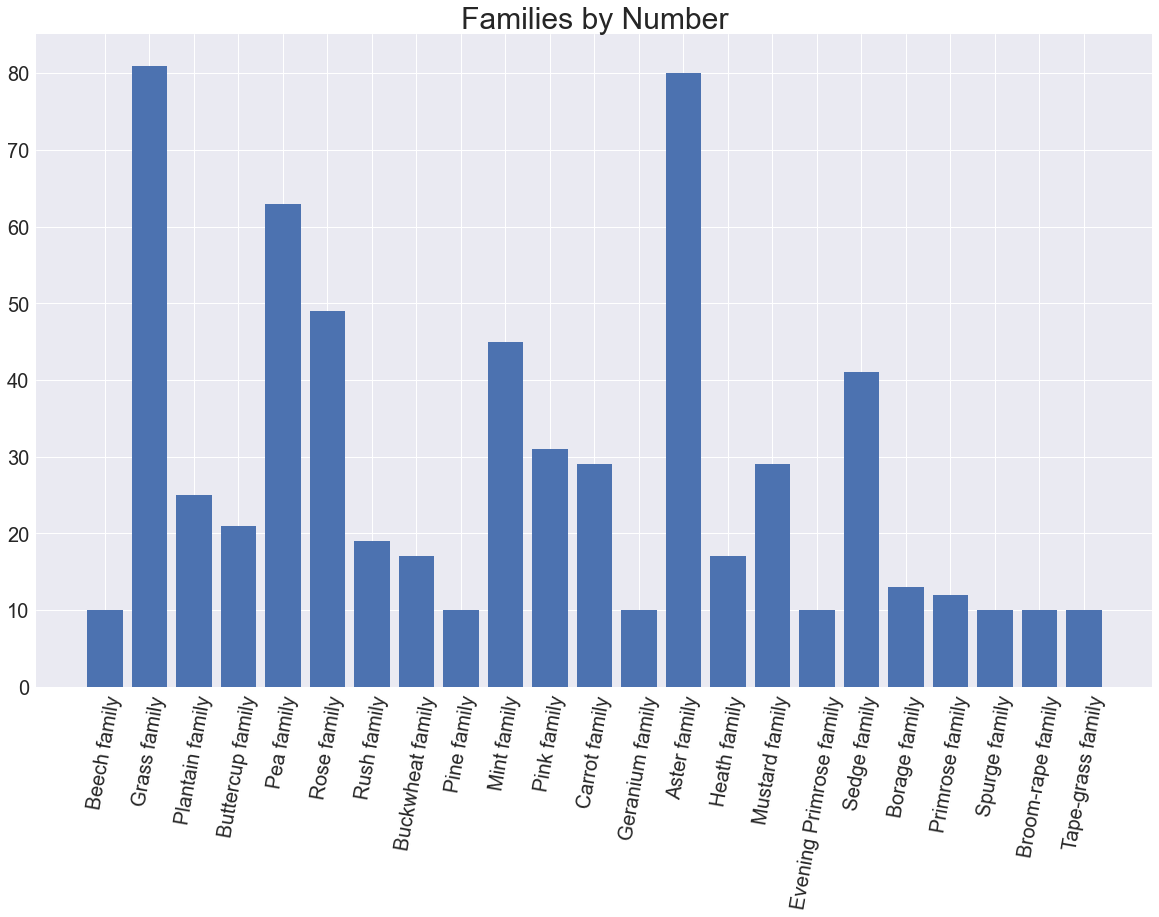

In [80]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=fam_names, height=fam_counts)
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

In [81]:
plant_dict[None]

113

In [82]:
plant_dict.pop(None)

113

In [83]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family': 3,
             'Honeys

In [86]:
plant_dict.keys()

dict_keys(['Beech family', 'Nettle family', 'Grass family', 'Plantain family', 'Buttercup family', 'Pea family', 'Olive family', 'Rose family', 'Birch family', 'Rush family', 'Buckwheat family', 'Soapberry family', 'Pine family', 'Mint family', 'Madder family', 'Pink family', 'Carrot family', 'Geranium family', 'Aster family', 'Horsetail family', 'Heath family', 'Loosestrife family', 'Bracken Fern family', 'Mustard family', 'Evening Primrose family', 'Willow family', 'Polypody family', 'Dogwood family', 'Honeysuckle family', 'Morning-glory family', 'Iris family', 'Spleenwort family', 'Amaranth family', 'Sedge family', 'Buckthorn family', 'Holly family', 'Potato family', 'Bellflower family', 'Wood-Sorrel family', 'Borage family', 'Bittersweet family', 'Primrose family', 'Poppy family', 'Spurge family', 'Cat-tail family', 'Arum family', 'Water-plantain family', 'Hemp family', 'Sumac family', 'Touch-me-not family', 'Broom-rape family', 'Elm family', 'Flax family', 'Stonecrop family', 'Bra

In [87]:
plant_dict2[None]

113

In [88]:
plant_dict2.pop(None)

113

In [89]:
plant_dict2[None]

KeyError: None

In [91]:
plant_dict2.get(None, "does not exist")

'does not exist'

In [84]:
plant_dict[None]

0

In [85]:
plant_dict.get(None)

0

## Synonyms

In [92]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [93]:
num_syn = [len(plant['synonyms']) for plant in plants]

In [94]:
max(num_syn)

342

In [95]:
min(num_syn)

0

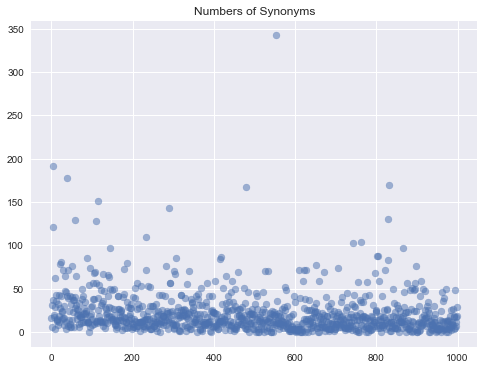

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [107]:
[plant for plant in plants if len(plant['synonyms']) == max(num_syn)][0]

{'id': 182597,
 'common_name': 'Irish potato',
 'slug': 'solanum-tuberosum',
 'scientific_name': 'Solanum tuberosum',
 'year': 1753,
 'bibliography': 'Sp. Pl.: 185 (1753)',
 'author': 'L.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Potato family',
 'genus_id': 4329,
 'image_url': 'https://bs.plantnet.org/image/o/95a0197b33f8efe2ea7a0d25f84476415779a4b5',
 'synonyms': ['Solanum tuberosum subsp. andigenum',
  'Solanum tuberosum f. chiar-pala',
  'Solanum tuberosum var. strobilinum',
  'Solanum tuberosum var. murukewillu',
  'Solanum stenotomum var. peruanum',
  'Larnax sylvarum subsp. novogranatensis',
  'Solanum andigenum f. tiahuanacense',
  'Solanum andigenum f. pallidum',
  'Solanum tuberosum var. batatinum',
  'Solanum tuberosum var. rugiorum',
  'Solanum andigenum f. ovatibaccatum',
  'Solanum tuberosum f. contortum',
  'Solanum andigenum f. llutuc-runtum',
  'Solanum andigenum var. mexicanum',
  'Solanum tuberosum var. album',
  'Solanum andigenum f. ancac

In [100]:
[plant for plant in plants if len(plant['synonyms']) > 150]

[{'id': 137025,
  'common_name': 'Red fescue',
  'slug': 'festuca-rubra',
  'scientific_name': 'Festuca rubra',
  'year': 1753,
  'bibliography': 'Sp. pl. 1:74.  1753',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Grass family',
  'genus_id': 1102,
  'image_url': 'https://bs.plantnet.org/image/o/0b932c8a275efc79f473a71bec20d6f15e9b6b90',
  'synonyms': ['Festuca rubra var. arenaria',
   'Bromus secundus',
   'Festuca kitaibeliana',
   'Festuca rubra var. lanuginosa',
   'Festuca michiganica',
   'Festuca pseudovivipara',
   'Festuca fallax',
   'Festuca rubra var. mediana',
   'Festuca ammobia',
   'Festuca aucta',
   'Festuca densiuscula',
   'Festuca vallicola',
   'Festuca ovina subsp. glauca',
   'Festuca calcarea',
   'Festuca rivularis subsp. pseudorivularis',
   'Festuca glauca',
   'Festuca heterophylla var. subheterophylla',
   'Festuca glabra',
   'Festuca oregona',
   'Festuca halleri',
   'Festuca iberica subsp. atlantigena',
   'Fe

In [101]:
len([plant for plant in plants if len(plant['synonyms']) > 150])

6

<details>
    <summary>
        Answer
    </summary>

```python
[plant for plant in plants if len(plant['synonyms']) > 300]
```
</details>

## Bibliography

In [111]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [108]:
biblios = [plant['bibliography'] for plant in plants]

In [109]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [112]:
hasbiblio = [plant for plant in plants if plant['bibliography'] != None]

In [113]:
hasbiblio

[{'id': 678281,
  'common_name': 'Evergreen oak',
  'slug': 'quercus-rotundifolia',
  'scientific_name': 'Quercus rotundifolia',
  'year': 1785,
  'bibliography': 'Encycl. 1: 723 (1785)',
  'author': 'Lam.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Beech family',
  'genus_id': 5778,
  'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
  'synonyms': ['Quercus lyauteyi',
   'Quercus rotundifolia f. crassicupulata',
   'Quercus ballota',
   'Quercus ilex f. brevicupulata',
   'Quercus calycina',
   'Quercus rotundifolia f. dolichocalyx',
   'Quercus rotundifolia f. pilosella',
   'Quercus rotundifolia f. macrocarpa',
   'Quercus rotundifolia f. calycina',
   'Quercus ilex f. macrocarpa',
   'Quercus ilex subsp. ballota',
   'Quercus rotundifolia var. pilosella',
   'Quercus rotundifolia var. brevicupulata',
   'Quercus rotundifolia subsp. maghrebiana',
   'Quercus rotundifolia f. brevicupulata',
   'Quercus rotundifolia va

In [114]:
len(hasbiblio)

994

In [115]:
linnaeans = [plant['bibliography'] for plant in hasbiblio if 'Linnaeus' in plant['bibliography']]
linnaeans

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

In [116]:
len(linnaeans)

1

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [117]:
sps = []
for plant in hasbiblio:
    if plant['bibliography'].startswith('Sp. Pl.'):
        sps.append(plant)

In [124]:
sps2 = []
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        sps2.append(plant)

In [125]:
len(sps)

445

In [126]:
len(sps2)

448

In [127]:
sps2

[{'id': 190500,
  'common_name': 'Stinging nettle',
  'slug': 'urtica-dioica',
  'scientific_name': 'Urtica dioica',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 984 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Nettle family',
  'genus_id': 1028,
  'image_url': 'https://bs.plantnet.org/image/o/85256a1c2c098e254fefe05040626a4df49ce248',
  'synonyms': ['Urtica major',
   'Urtica tibetica',
   'Urtica sicula',
   'Urtica eckloniana',
   'Urtica haussknechtii',
   'Urtica submitis'],
  'genus': 'Urtica',
  'family': 'Urticaceae',
  'links': {'self': '/api/v1/species/urtica-dioica',
   'plant': '/api/v1/plants/urtica-dioica',
   'genus': '/api/v1/genus/urtica'}},
 {'id': 126957,
  'common_name': 'Orchardgrass',
  'slug': 'dactylis-glomerata',
  'scientific_name': 'Dactylis glomerata',
  'year': 1753,
  'bibliography': 'Sp. Pl.: 71 (1753)',
  'author': 'L.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Grass family',

In [128]:
sp_authors = [sp['author'] for sp in sps2]

In [129]:
sp_authors

['L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',

In [130]:
uniq_auth = list(set(sp_authors))
uniq_auth

['(J.Presl & C.Presl) Parl.',
 '(L.) L.',
 'L.',
 None,
 'Willd.',
 'A.Haines (Linnaeus)']

In [131]:
uniq_auth[0]

'(J.Presl & C.Presl) Parl.'

In [132]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [133]:
counts

[1, 2, 442, 1, 1, 1]

In [134]:
dict(zip(uniq_auth, counts))

{'(J.Presl & C.Presl) Parl.': 1,
 '(L.) L.': 2,
 'L.': 442,
 None: 1,
 'Willd.': 1,
 'A.Haines (Linnaeus)': 1}

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

In [ ]:
sps2 = []
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        sps2.append(plant)

In [135]:
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        plant['author'] = 'L.'

In [136]:
sps = []
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        sps.append(plant)

In [137]:
sp_authors = set([sp['author'] for sp in sps])
sp_authors

{'L.'}

In [138]:
len(sps)

448

<details>
    <summary>
        Answer
    </summary>

```python
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl.'):
            plant['author'] = 'L.'
    except:
        continue
```
</details>

# Teaser: Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [139]:
# Need to first import pandas
import pandas as pd

In [140]:
plants_df = pd.DataFrame(plants)

In [141]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [142]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."


In [152]:
plants_df['family_common_name'].value_counts()

Grass family           81
Aster family           80
Pea family             63
Rose family            49
Mint family            45
                       ..
Bracken Fern family     1
Purslane family         1
Ginseng family          1
Eel-grass family        1
Barberry family         1
Name: family_common_name, Length: 102, dtype: int64

In [156]:
beech_df = plants_df.loc[plants_df['family_common_name'] == 'Beech family']
beech_df

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."
14,136773,European beech,fagus-sylvatica,Fagus sylvatica,1753.0,Sp. Pl.: 998 (1753),L.,accepted,species,Beech family,2976,https://bs.plantnet.org/image/o/a733221df31a1f...,"[Fagus purpurea, Fagus sylvestris, Fagus sylva...",Fagus,Fagaceae,"{'self': '/api/v1/species/fagus-sylvatica', 'p..."
46,173364,Cork oak,quercus-suber,Quercus suber,1753.0,Sp. Pl.: 995 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/18d98dce42b463...,"[Quercus suber f. longicalyx, Quercus suber f....",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-suber', 'pla..."
169,173319,Durmast oak,quercus-petraea,Quercus petraea,1784.0,Fl. Fuld.: 403 (1784),(Matt.) Liebl.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/d6e87a3672c022...,"[Quercus durinus, Quercus sublobata, Quercus p...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-petraea', 'p..."
182,1235993,European chestnut,castanea-sativa,Castanea sativa,1768.0,Gard. Dict. ed. 8: n.º 1 (1768),Mill.,accepted,species,Beech family,1508,https://bs.plantnet.org/image/o/0cc637d2605ef9...,"[Castanea vulgaris, Castanea vesca, Castanea c...",Castanea,Fagaceae,"{'self': '/api/v1/species/castanea-sativa', 'p..."
283,676548,Downy oak,quercus-pubescens,Quercus pubescens,1796.0,Berlin. Baumz.: 279 (1796),Willd.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/bf115f5afb1176...,"[Quercus cerris f. laciniatolyrata, Cerris aus...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-pubescens', ..."
431,173330,Northern red oak,quercus-rubra,Quercus rubra,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/9dda465d52b05d...,"[Quercus acerifolia, Quercus maxima, Quercus b...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-rubra', 'pla..."
445,676761,Coscoja,quercus-coccifera,Quercus coccifera,1753.0,Sp. Pl.: 995 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/c7d6434e0fcb6c...,"[Ilex aculeata, Quercus pseudococcifera, Querc...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-coccifera', ..."
814,678416,Algerian oak,quercus-canariensis,Quercus canariensis,1809.0,Enum. Pl.: 975 (1809),Willd.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/0718714bdba14b...,"[Quercus corymbifolia, Quercus viveri, Quercus...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-canariensis'...


In [143]:
plants_df.loc[plants_df['author'] == "L."]

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."
5,137025,Red fescue,festuca-rubra,Festuca rubra,1753.0,Sp. pl. 1:74. 1753,L.,accepted,species,Grass family,1102,https://bs.plantnet.org/image/o/0b932c8a275efc...,"[Festuca rubra var. arenaria, Bromus secundus,...",Festuca,Poaceae,"{'self': '/api/v1/species/festuca-rubra', 'pla..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,170694,Norwegian cinquefoil,potentilla-norvegica,Potentilla norvegica,1753.0,Sp. Pl.: 499 (1753),L.,accepted,species,Rose family,618,https://bs.plantnet.org/image/o/e0cafb7c39026c...,"[Potentilla monspeliensis, Potentilla norvegic...",Potentilla,Rosaceae,{'self': '/api/v1/species/potentilla-norvegica...
987,191418,Green field speedwell,veronica-agrestis,Veronica agrestis,1753.0,Sp. Pl.: 13 (1753),L.,accepted,species,Plantain family,3419,https://bs.plantnet.org/image/o/6e8fe06255953c...,"[Pocilla agrestis, Cochlidiosperma agreste, Ve...",Veronica,Plantaginaceae,"{'self': '/api/v1/species/veronica-agrestis', ..."
991,239777,Alpine thistle,carduus-defloratus,Carduus defloratus,1759.0,Syst. Nat. ed. 10 2: 1200 (1759),L.,accepted,species,Aster family,1461,https://bs.plantnet.org/image/o/b36c24b92180cd...,"[Carduus carlinifolius, Carduus crassifolius, ...",Carduus,Asteraceae,"{'self': '/api/v1/species/carduus-defloratus',..."
993,178677,Rock soapwort,saponaria-ocymoides,Saponaria ocymoides,1753.0,Sp. Pl.: 409 (1753),L.,accepted,species,Pink family,3342,https://bs.plantnet.org/image/o/3a6df46121e90a...,"[Silene ocymoides, Silene alsinoides, Saponari...",Saponaria,Caryophyllaceae,{'self': '/api/v1/species/saponaria-ocymoides'...


In [144]:
pd.read_json('data/plants.json')

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,162791,Dallisgrass,paspalum-dilatatum,Paspalum dilatatum,1804.0,"J.B.A.M.de Lamarck, Encycl. 5: 35 (1804)",Poir.,accepted,species,Grass family,2451,https://bs.plantnet.org/image/o/4d598e0790de0b...,"[Paspalum pedunculare, Paspalum ovatum, Paspal...",Paspalum,Poaceae,"{'self': '/api/v1/species/paspalum-dilatatum',..."
996,191969,Mung bean,vigna-radiata,Vigna radiata,1954.0,Fl. Congo Belge 6: 286 (1954),(L.) R.Wilczek,accepted,species,Pea family,6303,https://bs.plantnet.org/image/o/0457e52a60ae8a...,"[Phaseolus radiatus, Pueraria chanetii, Azukia...",Vigna,Fabaceae,"{'self': '/api/v1/species/vigna-radiata', 'pla..."
997,641928,Spiny broom,calicotome-villosa,Calicotome villosa,1808.0,Neues J. Bot. 2(2): 51 (1808),(Poir.) Link,accepted,species,Pea family,13040,https://bs.plantnet.org/image/o/6032fde46086a3...,"[Cytisus laniger, Genista lanigera, Spartium l...",Calicotome,Fabaceae,"{'self': '/api/v1/species/calicotome-villosa',..."
998,131643,Fewflower spikerush,eleocharis-quinqueflora,Eleocharis quinqueflora,1949.0,Mitt. Thüring. Bot. Ges. 1: 89 (1949),(Hartmann) O.Schwarz,accepted,species,Sedge family,2672,None,"[Scirpus campestris, Eleocharis pauciflora, Sc...",Eleocharis,Cyperaceae,{'self': '/api/v1/species/eleocharis-quinquefl...


In [147]:
pd.read_json('data/new_releases.json')

,albums
href,https://api.spotify.com/v1/browse/new-releases...
items,"[{'album_type': 'album', 'artists': [{'externa..."
limit,20
next,https://api.spotify.com/v1/browse/new-releases...
offset,0
previous,None
total,100


In [150]:
pd.DataFrame(albums)

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/4b...,https://api.spotify.com/v1/albums/4bNPOFOzxGhF...,4bNPOFOzxGhF5jhfIK6lit,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",High Off Life,2020-05-15,day,21,album,spotify:album:4bNPOFOzxGhF5jhfIK6lit
1,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/3L...,https://api.spotify.com/v1/albums/3LhriqAiHJYw...,3LhriqAiHJYw7rxvtlkvQc,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Lose Somebody,2020-05-15,day,1,album,spotify:album:3LhriqAiHJYw7rxvtlkvQc
2,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2Z...,https://api.spotify.com/v1/albums/2Zg5xZo3WwIo...,2Zg5xZo3WwIoAZys8OcUpG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",SCOOB! The Album,2020-05-15,day,12,album,spotify:album:2Zg5xZo3WwIoAZys8OcUpG
3,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2m...,https://api.spotify.com/v1/albums/2m5J1DUH7hJp...,2m5J1DUH7hJpPSOromIqpN,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Daisies,2020-05-15,day,1,album,spotify:album:2m5J1DUH7hJpPSOromIqpN
4,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/39...,https://api.spotify.com/v1/albums/39xhYyNNDatQ...,39xhYyNNDatQtgKw2KdXMz,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",THE GOAT,2020-05-15,day,16,album,spotify:album:39xhYyNNDatQtgKw2KdXMz
5,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/0i...,https://api.spotify.com/v1/albums/0i96PtPJV65d...,0i96PtPJV65ddxsfMfo45F,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",XV,2020-05-15,day,2,album,spotify:album:0i96PtPJV65ddxsfMfo45F
6,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/3a...,https://api.spotify.com/v1/albums/3a9qH2VEsSiO...,3a9qH2VEsSiOZvMrjaS0Nu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",how i'm feeling now,2020-05-15,day,11,album,spotify:album:3a9qH2VEsSiOZvMrjaS0Nu
7,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CH, C...",{'spotify': 'https://open.spotify.com/album/3l...,https://api.spotify.com/v1/albums/3lalGt6k7JM3...,3lalGt6k7JM3tIji1Xbgmk,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Temperature Rising,2020-05-15,day,1,album,spotify:album:3lalGt6k7JM3tIji1Xbgmk
8,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/6d...,https://api.spotify.com/v1/albums/6daEdTBi1hyF...,6daEdTBi1hyFQgmsnR7oRr,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Set My Heart On Fire Immediately,2020-05-15,day,13,album,spotify:album:6daEdTBi1hyFQgmsnR7oRr
9,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2k...,https://api.spotify.com/v1/albums/2kx4l1OQNT2J...,2kx4l1OQNT2JXLld9HJDIh,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Good Intentions (Brown Boy 2 Deluxe Version),2020-05-11,day,32,album,spotify:album:2kx4l1OQNT2JXLld9HJDIh


## Exercises for Later

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

<details>
    <summary>Answer here
    </summary>

```python
plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']
```
</details>

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

In [ ]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>

```python
recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);
```    
</details>